In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
from PIML.box.boxWR import BoxWR

In [5]:
br = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [118.36511806290223, 126.43542909949568, 126.19278367193178, 109.7742722291957, 99.00123202697678, 82.00257252430589, 74.44037606583458, 46.286434461921196, 23.827726724918577, 10.009192192906355, 6.376586782204838]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


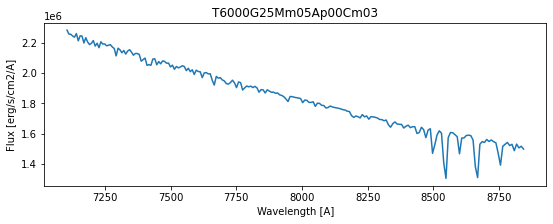

In [7]:
W="RedM"; R="R"; Res=5000;step=10;
br.init(W,R, Res,step, onPCA=1)

In [15]:
NL, NL2 = 100, 30
br.estimate_snr(NL), br.estimate_snr(NL2)

(9.424026021444387, 29.45304174184244)

In [16]:
diff_10k_100, bias_10k_100 = br.eval_pca_bias(br.PhyMid, 10000, noise_level=NL)
diff_10k_30, bias_10k_30 = br.eval_pca_bias(br.PhyMid, 10000, noise_level=NL2)
diff_1M_100, bias_1M_100 = br.eval_pca_bias(br.PhyMid, 1000000, noise_level=NL)

noise_level 100
noise_level 30
noise_level 100


In [17]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

In [32]:
dt, biast, nu,x = br.eval_pca_bias(br.PhyMid, 10000, noise_level=NL)

noise_level 100


In [33]:
x

array([0.02100833, 0.02113273, 0.02114084, 0.02118726, 0.02122562,
       0.02111206, 0.02134405, 0.02118617, 0.02119088, 0.02141047,
       0.02124523, 0.0213802 , 0.0214648 , 0.021425  , 0.02133437,
       0.02151101, 0.0214195 , 0.02156786, 0.02137173, 0.02144683,
       0.02144142, 0.02150079, 0.02148917, 0.02146828, 0.02154037,
       0.02159486, 0.02184301, 0.02158441, 0.02163751, 0.02173414,
       0.02165763, 0.0217805 , 0.02167948, 0.0216328 , 0.02171803,
       0.02182012, 0.0217612 , 0.02176289, 0.02179394, 0.02203215,
       0.02196957, 0.02191915, 0.02216936, 0.02215103, 0.02217182,
       0.02195338, 0.02194489, 0.02215394, 0.02203995, 0.02211533,
       0.02201907, 0.02203587, 0.02210122, 0.0220944 , 0.02222958,
       0.02216483, 0.02232092, 0.02221304, 0.02226544, 0.02223423,
       0.02218838, 0.0222192 , 0.02236553, 0.02227845, 0.02240272,
       0.02233514, 0.02250585, 0.02234803, 0.02239711, 0.0224095 ,
       0.02262807, 0.02245139, 0.02243944, 0.02248909, 0.02248

In [36]:
np.mean(nu**2)

189479.8793473503

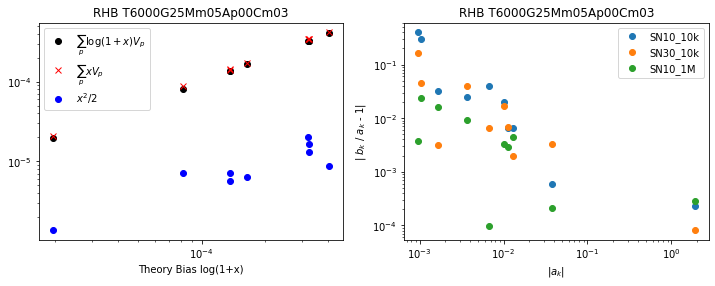

In [26]:
br.plot_bias_evals(diffs, bias_1M_100, pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])